In [85]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [86]:
train_df=pd.read_csv('titanic_train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [88]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [89]:
train_df['Age'].median()

28.0

In [90]:
train_df['Embarked'].mode()

0    S
dtype: object

In [91]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode(), inplace=True)

In [92]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [93]:
train_df.drop(columns=['PassengerId','Cabin'], axis=1, inplace=True)

In [94]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [95]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [96]:
#Visulization

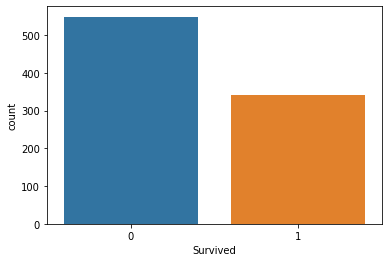

In [97]:
plt.figure()
sns.countplot(x='Survived', data= train_df)

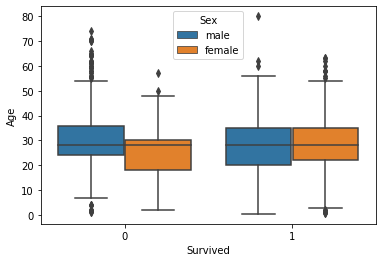

In [98]:
plt.figure
sns.boxplot(x='Survived', y= 'Age', hue='Sex', data= train_df)

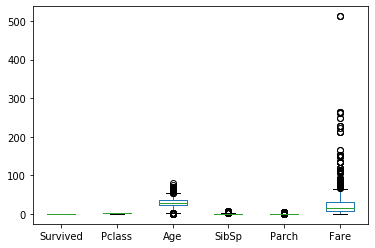

In [99]:
train_df.plot(kind='box')

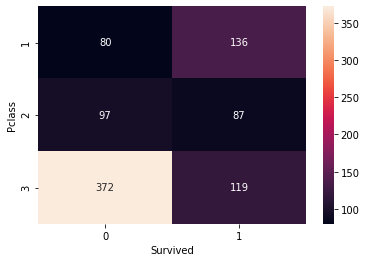

In [100]:
# Group the dataset by Pclass and Survived and then unstack them 
group = train_df.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 
  
# Heatmap - Color encoded 2D representation of data. 
sns.heatmap(pclass_survived, annot = True, fmt ="d") 

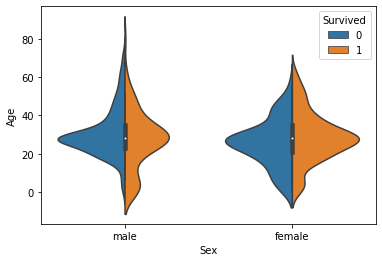

In [101]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",  
data = train_df, split = True)

In [102]:
#The survival rate is
#Good for children.
#High for women in the age range 20-40.
#Less for men as the age increases.

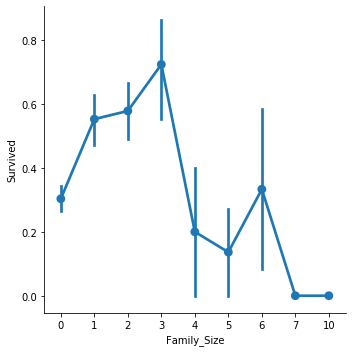

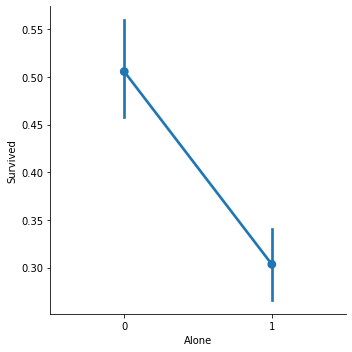

In [103]:
# Adding a column Family_Size 
train_df['Family_Size'] = 0
train_df['Family_Size'] = train_df['Parch']+train_df['SibSp'] 
  
# Adding a column Alone 
train_df['Alone'] = 0
train_df.loc[train_df.Family_Size == 0, 'Alone'] = 1
  
# Factorplot for Family_Size 
sns.factorplot(x ='Family_Size', y ='Survived', data =train_df) 
  
# Factorplot for Alone 
sns.factorplot(x ='Alone', y ='Survived', data =train_df) 

In [ ]:
# alone passenger's survival rate is less and 
#family size of 3 has highest survival rate.

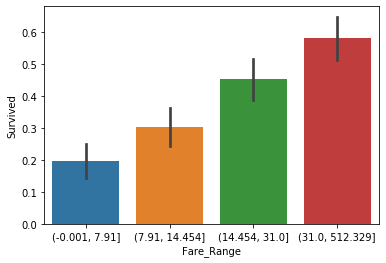

In [104]:
train_df['Fare_Range'] = pd.qcut(train_df['Fare'], 4) 
  
# Barplot 
sns.barplot(x ='Fare_Range', y ='Survived',  
data = train_df) 

In [ ]:
# if fare is higher, the survival rate is more.